In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('trainOrg.csv', usecols=['Age','Fare','Survived'])

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [9]:
X = df.drop(columns=['Survived'])
Y = df['Survived']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape

((712, 2), (179, 2))

In [13]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [15]:
X_train.head()

,Age,Fare,Age_imputed
140,NaN,15.2458,NaN
439,31.0,10.5000,31.0
817,31.0,37.0042,31.0
378,20.0,4.0125,20.0
491,21.0,7.2500,21.0


In [35]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

C:\Users\yasir\AppData\Local\Temp\ipykernel_16424\3090101260.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values


In [45]:
X_train

,Age,Fare,Age_imputed
140,NaN,15.2458,25.0
439,31.0,10.5000,31.0
817,31.0,37.0042,31.0
378,20.0,4.0125,20.0
491,21.0,7.2500,21.0
...,...,...,...
835,39.0,83.1583,39.0
192,19.0,7.8542,19.0
629,NaN,7.7333,30.0
559,36.0,17.4000,36.0


C:\Users\yasir\AppData\Local\Temp\ipykernel_16424\1889365756.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'], label='Original', hist=False)
C:\Users\yasir\AppData\Local\Temp\ipykernel_16424\1889365756.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_trai

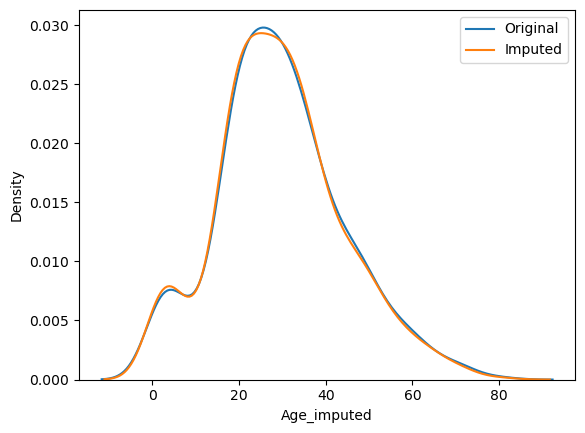

In [51]:
import seaborn as sns
sns.distplot(X_train['Age'], label='Original', hist=False)
sns.distplot(X_train['Age_imputed'], label='Imputed', hist=False)

plt.legend()
plt.show()

In [53]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  213.7165085187578
Variance after random imputation:  210.29354425875914


In [55]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2513.549265,79.072379,55.689067
Age,79.072379,213.716509,213.716509
Age_imputed,55.689067,213.716509,210.293544


<Axes: >

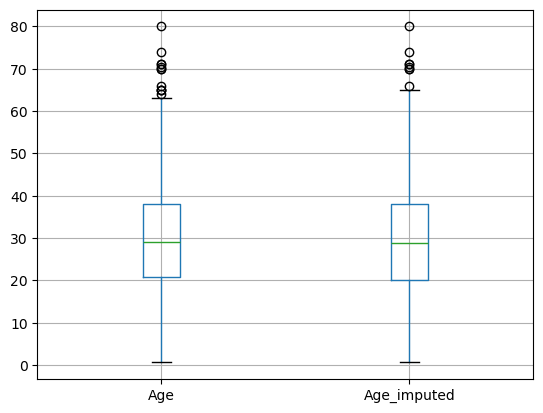

In [57]:
X_train[['Age', 'Age_imputed']].boxplot()

In [59]:
sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

NameError: name 'observation' is not defined

In [98]:
data = pd.read_csv('train.csv', usecols=['GarageQual', 'FireplaceQu', 'SalePrice'])

In [100]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [102]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [104]:
X = data
Y = data['SalePrice']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [108]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [110]:
X_train.head()

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
455,TA,TA,175500,TA,TA
863,NaN,TA,132500,TA,NaN
504,Fa,TA,147000,TA,Fa
1413,Gd,TA,257000,TA,Gd
1389,Gd,TA,131000,TA,Gd


In [92]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

C:\Users\yasir\AppData\Local\Temp\ipykernel_16424\77148749.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'

In [118]:
temp = pd.concat(
    [
        X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
        X_train['GarageQual_imputed'].value_counts() / len(X_train)
    ],
    axis=1)
temp.columns = ['original','imputed']

In [120]:
temp

,original,imputed
TA,0.951043,0.898116
Fa,0.037171,0.035103
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [124]:
temp = pd.concat(
    [
        X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
        X_train['FireplaceQu_imputed'].value_counts() / len(df)
    ],
    axis=1)
temp.columns = ['original','imputed']
temp

,original,imputed
Gd,0.494272,0.338945
TA,0.412439,0.282828
Fa,0.040917,0.028058
Po,0.027823,0.019080
Ex,0.024550,0.016835


C:\Users\yasir\AppData\Local\Temp\ipykernel_16424\2009137055.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'], hist=False, label=category)
C:\Users\yasir\AppData\Local\Temp\ipykernel_16424\2009137055.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297445

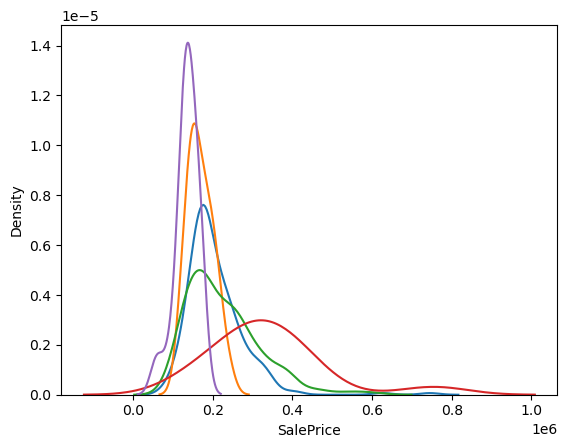

In [126]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'], hist=False, label=category)

plt.show()

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.impute import MissingIndicator, SimpleImputer

In [45]:
df = pd.read_csv('trainOrg.csv', usecols=['Age','Fare','Survived'])

In [47]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [49]:
X = df.drop(columns=['Survived'])
Y = df['Survived']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=2, test_size=0.2)

X_train.shape, X_test.shape

((712, 2), (179, 2))

In [17]:
X_train.head()

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458


In [19]:
si = SimpleImputer()
X_train_trf = si.fit_transform(X_train)
X_test_trf = si.transform(X_test)

In [21]:
X_train_trf

array([[ 40.        ,  27.7208    ],
       [  4.        ,  16.7       ],
       [ 47.        ,   9.        ],
       ...,
       [ 71.        ,  49.5042    ],
       [ 29.78590426, 221.7792    ],
       [ 29.78590426,  25.925     ]])

In [25]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_trf, y_train)
y_pred = clf.predict(X_test_trf)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6145251396648045

In [27]:
mi = MissingIndicator()

In [29]:
mi.fit(X_train)

MissingIndicator()

In [31]:
mi.features_

array([0], dtype=int64)

In [33]:
X_train_missing = mi.transform(X_train)
X_train_missing

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [35]:
X_test_missing = mi.transform(X_test)
X_test_missing

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [37]:
X_train['Age_NA'] = X_train_missing

In [39]:
X_train

,Age,Fare,Age_NA
30,40.0,27.7208,False
10,4.0,16.7000,False
873,47.0,9.0000,False
182,9.0,31.3875,False
876,20.0,9.8458,False
...,...,...,...
534,30.0,8.6625,False
584,NaN,8.7125,True
493,71.0,49.5042,False
527,NaN,221.7792,True


In [41]:
X_test

,Age,Fare
707,42.0,26.2875
37,21.0,8.0500
615,24.0,65.0000
169,28.0,56.4958
68,17.0,7.9250
...,...,...
89,24.0,8.0500
80,22.0,9.0000
846,NaN,69.5500
870,26.0,7.8958


In [63]:
si = SimpleImputer()

X_train_trf2 = si.fit_transform(X_train)
X_test_trf2 = si.transform(X_test)

In [53]:
si = SimpleImputer(add_indicator=True)

In [55]:
X_train = si.fit_transform(X_train)

In [59]:
X_test = si.transform(X_test)

In [65]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf2, y_train)
y_pred = clf.predict(X_test_trf2)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6312849162011173